In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# K Nearest Neighbors (KNN)

**Метод ближайших соседей** (k Nearest Neighbors, или kNN) — очень популярный метод классификации, также иногда используемый в задачах регрессии. Это один из самых понятных подходов к классификации. На уровне интуиции суть метода такова: посмотри на соседей; какие преобладают — таков и ты. Формально основой метода является гипотеза компактности: если метрика расстояния между примерами введена достаточно удачно, то схожие примеры гораздо чаще лежат в одном классе, чем в разных.

![K Nearest Neighbors (KNN)](./knn.png)

Для классификации каждого из объектов тестовой выборки необходимо последовательно выполнить следующие операции:

1) Вычислить расстояние до каждого из объектов обучающей выборки.
2) Отобрать объекты обучающей выборки, расстояние до которых минимально.
3) Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди $k$ ближайших соседей.

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке.

# Обработка данных

In [2]:
all_data = pd.read_csv('./forest_dataset.csv')
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


In [3]:
all_data.shape

(10000, 55)

Выделим значения метки класса в переменную `labels`, признаковые описания — в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [4]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

# Пара слов о sklearn

**[Sklearn](https://scikit-learn.org/stable/index.html)** — удобная библиотека для знакомства с машинным обучением. В ней реализованны большинство стандартных алгоритмов для построения моделей и работ с выборками. У неё есть подробная документация на английском. `Sklearn` предполагает, что выборки имеют вид пар $(X, y)$, где $X$ — матрица признаков, $y$ — вектор истинных значений целевой переменной, или просто $X$, если целевые переменные неизвестны.

Познакомимся со вспомогательной функцией [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). С её помощью можно разбить выборку на обучающую и тестовую части.

Будем работать со всеми 7 типами покрытия. Разделим выборку на обучающую и тестовую с помощью метода `train_test_split()`.

In [5]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(feature_matrix, labels, test_size=0.2, random_state=42)

Параметр `test_size` контролирует, какая часть выборки будет тестовой. Более подробно о нём можно прочитать в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

Основные объекты `Sklearn` — так называемые `Estimators` (модели). Они делятся на **классификаторы** и **регрессоры**. В качестве примера моделей можно привести классификаторы [метод ближайших соседей](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) и [логистическую регрессию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

У всех моделей в `Sklearn` обязательно должно быть хотя бы 2 метода — `fit()` и `predict()`. Метод `fit(X, y)` отвечает за обучение модели и принимает на вход обучающую выборку в виде *матрицы признаков* $X$ и *вектора ответов* $y$. У обученной после `fit()` модели теперь можно вызывать метод `predict(X)`, который вернёт предсказания этой модели на всех объектах из матрицы $X$ в виде вектора. Вызывать `fit()` у одной и той же модели можно несколько раз, каждый раз она будет обучаться заново на переданном наборе данных. Ещё у моделей есть *гиперпараметры*, которые обычно задаются при создании модели.

# Обучение модели KNeighborsClassifier

Качество классификации/регрессии методом ближайших соседей зависит от нескольких параметров:

* число соседей `n_neighbors`;
* метрика расстояния между объектами `metric`;
* веса соседей (соседи тестового примера могут входить с разными весами, например, чем дальше пример, тем с меньшим коэффициентом учитывается его "голос") `weights`.


Обучим на датасете `KNeighborsClassifier` из `Sklearn`.

In [6]:
clf = KNeighborsClassifier()

clf.fit(X=train_feature_matrix, y=train_labels)

y_pred = clf.predict(X=test_feature_matrix)

Теперь измерим качество нашей модели. Для этого можно использовать метод `score(X, y)`, который посчитает какую-то функцию ошибки на выборке $X, y$, но какую конкретно уже зависит от модели. Также можно использовать одну из функций модуля `metrics`, например [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), которая вычисляет точность предсказаний.

In [7]:
print(f'Точность модели на тестовой выборке: {accuracy_score(test_labels, y_pred)}')

Точность модели на тестовой выборке: 0.7365


Переберем все возможные гиперпараметры модели в разумных пределах с помощью класса [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), который осуществляет поиск (search) по сетке (grid) и вычисляет качество модели с помощью кросс-валидации (CV).

In [8]:
params = {
    'n_neighbors': np.arange(1, 11),
    'metric': ['manhattan', 'euclidean'],
    'weights': ['uniform', 'distance']
}

clf_grid = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)

clf_grid.fit(X=feature_matrix, y=labels)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

Передаём в `GridSearchCV` всю выборку, а не только её обучающую часть. Это можно делать, так как поиск всё равно использует кросс-валидацию. Однако порой от выборки всё-же отделяют *валидационную* часть, так как гиперпараметры в процессе поиска могли переобучиться под выборку.

Выведем наилучшие параметры.

In [9]:
clf_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

Используя найденные оптимальные параметры, вычислим точность модели и вероятности принадлежности к классам для тестовой выборки (`.predict_proba()`).

In [10]:
optimal_clf = KNeighborsClassifier(n_neighbors=4, metric='manhattan', weights='distance')

optimal_clf.fit(X=train_feature_matrix, y=train_labels)

pred = optimal_clf.predict(X=test_feature_matrix)

pred_prob = optimal_clf.predict_proba(X=test_feature_matrix)

In [11]:
print(f'Точность наилучшей модели на тестовой выборке: {accuracy_score(test_labels, pred)}')

Точность наилучшей модели на тестовой выборке: 0.785


Создадим и визуализируем столбчатую диаграмму, которая покажет долю всех реальных классов в выборке и долю предсказанных классов.

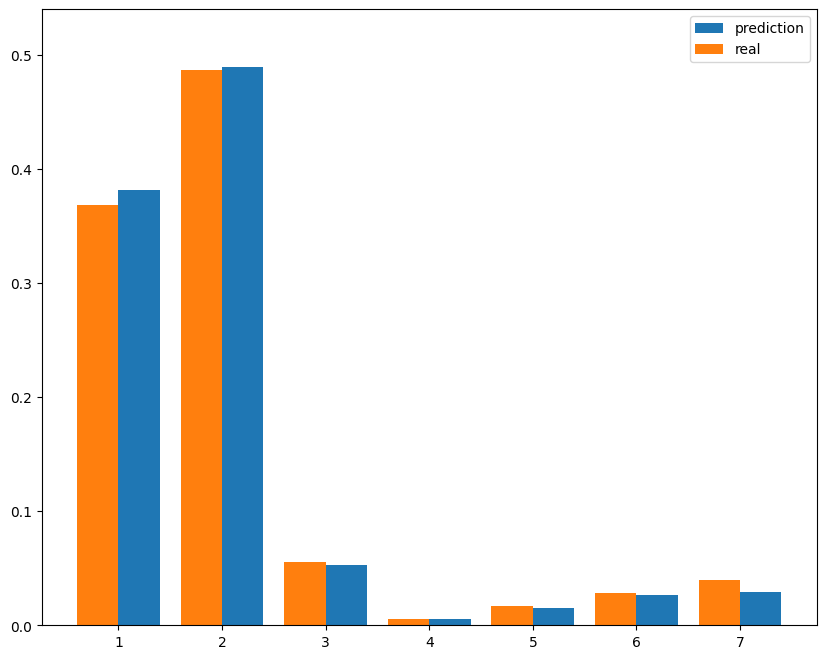

In [12]:
unique, freq = np.unique(test_labels, return_counts=True)
freq = list(map(lambda x: x / len(test_labels),freq))

pred_freq = pred_prob.mean(axis=0)

plt.figure(figsize=(10, 8))

plt.bar(range(1, 8), pred_freq, width=0.4, align="edge", label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align="edge", label='real')

plt.ylim(0, 0.54)
plt.legend()
plt.show()